In [83]:
import yfinance as yf

df = yf.download(tickers='BMW.DE', period='2y', interval='1h')


[*********************100%%**********************]  1 of 1 completed


In [84]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-06-08 09:00:00+02:00,82.680000,83.519997,82.620003,83.190002,83.190002,0
2022-06-08 10:00:00+02:00,83.120003,83.430000,82.760002,83.320000,83.320000,88778
2022-06-08 11:00:00+02:00,83.309998,83.620003,82.919998,83.540001,83.540001,58976
2022-06-08 12:00:00+02:00,83.510002,83.760002,83.360001,83.720001,83.720001,54332
2022-06-08 13:00:00+02:00,83.709999,83.860001,83.629997,83.720001,83.720001,63152
...,...,...,...,...,...,...
2024-06-07 13:00:00+02:00,90.480003,90.559998,90.260002,90.519997,90.519997,62891
2024-06-07 14:00:00+02:00,90.500000,90.660004,90.199997,90.300003,90.300003,45627
2024-06-07 15:00:00+02:00,90.279999,91.180000,90.260002,90.900002,90.900002,55192


In [85]:
import pandas as pd
import pandas_ta as ta

# Assuming df is your DataFrame containing OHLCV data
# Make sure your DataFrame has columns like 'Open', 'High', 'Low', 'Close', 'Volume'

# Filter out rows with zero volume
df = df[df['Volume'] != 0]

# Convert the DataFrame index to datetime (assuming your index represents timestamps)
df.index = pd.to_datetime(df.index)

# Extract date and time features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute

# Assuming your DataFrame index is in UTC, you might want to convert it to the timezone relevant for the European market
# Example:
# df = df.tz_localize('UTC').tz_convert('Europe/Paris')
# Reset the index without adding the previous index as a new column
df.reset_index(drop=True, inplace=True)

# Now the DataFrame will have a default integer index without the previous index as a column

# Calculate RSI with a length of 14
df['RSI'] = ta.rsi(df['Close'], length=14).fillna(method='bfill')

# Calculate EMA with a length of 4
df['EMA'] = ta.ema(df['Close'], length=4).fillna(method='bfill')

# Optionally, you might want to resample the data to 1-hour timeframe
# Example:
# df = df.resample('1H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum', 'RSI': 'last', 'EMA': 'last'})

# Note: The resampling approach may vary depending on how you want to handle the OHLCV data

# Now you can use the modified DataFrame for further analysis or visualization
df

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\1647758241.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\1647758241.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\1647758241.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA
0,83.120003,83.430000,82.760002,83.320000,83.320000,88778,2022,6,8,10,0,27.642948,83.575001
1,83.309998,83.620003,82.919998,83.540001,83.540001,58976,2022,6,8,11,0,27.642948,83.575001
2,83.510002,83.760002,83.360001,83.720001,83.720001,54332,2022,6,8,12,0,27.642948,83.575001
3,83.709999,83.860001,83.629997,83.720001,83.720001,63152,2022,6,8,13,0,27.642948,83.575001
4,83.760002,84.000000,83.580002,83.589996,83.589996,78069,2022,6,8,14,0,27.642948,83.580999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,90.480003,90.559998,90.260002,90.519997,90.519997,62891,2024,6,7,13,0,29.803311,90.761012
4095,90.500000,90.660004,90.199997,90.300003,90.300003,45627,2024,6,7,14,0,27.653924,90.576609
4096,90.279999,91.180000,90.260002,90.900002,90.900002,55192,2024,6,7,15,0,40.299842,90.705966
4097,90.900002,91.419998,90.900002,91.199997,91.199997,46251,2024,6,7,16,0,45.435485,90.903578


In [86]:
EMAsignal = [0]*len(df)
backcandles = 15

for row in range(backcandles, len(df)):
    upt = 1
    dnt = 1
    for i in range(row-backcandles, row+1):
        if max(df.Open[i], df.Close[i])>=df.EMA[i]:
            dnt=0
        if min(df.Open[i], df.Close[i])<=df.EMA[i]:
            upt=0
    if upt==1 and dnt==1:
        EMAsignal[row]=3
    elif upt==1:
        EMAsignal[row]=2
    elif dnt==1:
        EMAsignal[row]=1

df['EMASignal'] = EMAsignal

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\3269106155.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
import pandas as pd
import numpy as np

def isPivot(candle, window):
    """
    Function that detects if a candle is a pivot/fractal point.
    Args: 
        candle (int): Candle index.
        window (int): Number of candles before and after the current candle to test if it is a pivot.
    Returns:
        int: 1 if pivot high, 2 if pivot low, 3 if both, and 0 by default.
    """
    if candle - window < 0 or candle + window >= len(df):
        return 0

    pivotHigh = 1
    pivotLow = 2
    for i in range(candle - window, candle + window + 1):
        if df.iloc[candle].Low > df.iloc[i].Low:
            pivotLow = 0
        if df.iloc[candle].High < df.iloc[i].High:
            pivotHigh = 0
    if pivotHigh and pivotLow:
        return 3
    elif pivotHigh:
        return pivotHigh
    elif pivotLow:
        return pivotLow
    else:
        return 0

def pointpos(row):
    """
    Function to determine the position for plotting pivot points.
    Args:
        row (pd.Series): A row from the DataFrame.
    Returns:
        float: Position to plot the pivot point.
    """
    if row['isPivot'] == 2:
        return row['Low'] - 1e-3
    elif row['isPivot'] == 1:
        return row['High'] + 1e-3
    else:
        return np.nan

# Define window size
window = 5

# Apply the isPivot function to each row
df['isPivot'] = df.apply(lambda x: isPivot(x.name, window), axis=1)

# Apply the pointpos function to each row
df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\2696132696.py:51: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\2696132696.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



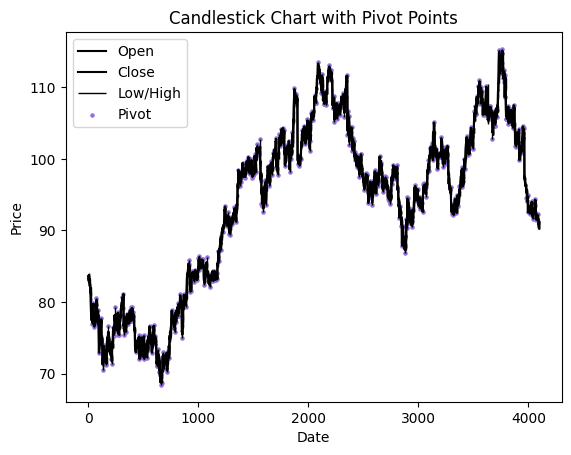

In [89]:
import matplotlib.pyplot as plt

# Assuming dfpl is your pandas DataFrame
dfpl = df

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot candlestick chart
ax.plot(dfpl.index, dfpl['Open'], color='black', label='Open', linestyle='-')
ax.plot(dfpl.index, dfpl['Close'], color='black', label='Close', linestyle='-')
ax.vlines(dfpl.index, dfpl['Low'], dfpl['High'], color='black', linewidth=1, label='Low/High')

# Plot scatter plot for pivot points
ax.scatter(dfpl.index, dfpl['pointpos'], color='MediumPurple', label='Pivot', s=5)

# Customize plot
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Candlestick Chart with Pivot Points')
ax.legend()

# Show plot
plt.show()


In [90]:
def detect_structure(candle, backcandles, window):
    """
    Attention! window should always be greater than the pivot window! to avoid look ahead bias
    """
    localdf = df[candle-backcandles-window:candle-window]
    highs = localdf[localdf['isPivot'] == 1].High.tail(3).values
    idxhighs = localdf[localdf['isPivot'] == 1].High.tail(3).index
    lows = localdf[localdf['isPivot'] == 2].Low.tail(3).values
    idxlows = localdf[localdf['isPivot'] == 2].Low.tail(3).index

    pattern_detected = False

    lim1 = df['High'].mean()-df['Low'].mean()
    lim2 = lim1/3
    if len(highs) == 3 and len(lows) == 3:
        order_condition = (idxlows[0] < idxhighs[0]
                           < idxlows[1] < idxhighs[1]
                           < idxlows[2] < idxhighs[2])
        diff_condition = (
                            abs(lows[0]-highs[0])>lim1 and
                            abs(highs[0]-lows[1])>lim2 and
                            abs(highs[1]-lows[1])>lim1 and
                            abs(highs[1]-lows[2])>lim2
                            )
        pattern_1 = (lows[0] < highs[0] and
            lows[1] > lows[0] and lows[1] < highs[0] and
            highs[1] > highs[0] and
            lows[2] > lows[1] and lows[2] < highs[1] and
            highs[2] < highs[1] and highs[2] > lows[2]
            )

        pattern_2 = (lows[0] < highs[0] and
            lows[1] > lows[0] and lows[1] < highs[0] and
            highs[1] > highs[0] and
            lows[2] < lows[1] and
            highs[2] < highs[1]
            )

        if (order_condition and
            diff_condition and
            (pattern_1 or pattern_2)
        ):
            pattern_detected = True

    if pattern_detected:
        return 1
    else:
        return 0

In [91]:
df['CHOCH_pattern_detected'] = df.index.map(lambda x: detect_structure(x, backcandles=40, window=6))

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\2957290366.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
df[df['CHOCH_pattern_detected']!=0]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,Minute,RSI,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected
576,74.400002,74.839996,74.279999,74.720001,74.720001,46100,2022,9,15,17,0,50.237119,74.567897,0,0,NaN,1
577,72.970001,73.349998,72.889999,73.139999,73.139999,58854,2022,9,16,10,0,35.527983,73.996738,0,2,72.888999,1
578,73.120003,73.739998,73.120003,73.529999,73.529999,376071,2022,9,16,11,0,40.183565,73.810042,0,0,NaN,1
579,73.529999,73.919998,73.349998,73.820000,73.820000,51753,2022,9,16,12,0,43.453425,73.814025,0,0,NaN,1
1787,99.169998,100.300003,98.940002,100.059998,100.059998,222553,2023,4,20,16,0,32.667562,100.176014,0,2,98.939002,1
2006,103.739998,103.980003,103.699997,103.760002,103.760002,70472,2023,5,31,11,0,43.571369,104.035583,0,0,NaN,1
2007,103.779999,103.959999,103.580002,103.860001,103.860001,25698,2023,5,31,12,0,45.221761,103.965350,0,0,NaN,1
2275,106.400002,106.660004,106.360001,106.599998,106.599998,32888,2023,7,17,17,0,47.404637,106.518496,0,0,NaN,1
2276,107.459999,107.800003,107.180000,107.279999,107.279999,34346,2023,7,18,10,0,57.285456,106.823097,0,1,107.801003,1
2277,107.300003,107.360001,107.099998,107.180000,107.180000,15292,2023,7,18,11,0,55.630349,106.965858,0,0,NaN,1


In [93]:
def generate_signal(df, l, backcandles, gap, zone_threshold, price_diff_threshold):
    if l < backcandles + gap or l >= len(df):
        return (0, 0, 0, 0, 0)  # Return neutral signal if not enough data

    max_price = df.High[l - backcandles:l - gap].max()
    min_price = df.Low[l - backcandles:l - gap].min()
    index_max = df.High[l - backcandles:l - gap].idxmax()
    index_min = df.Low[l - backcandles:l - gap].idxmin()
    price_diff = max_price - min_price

    if (df.EMASignal[l] == 2 and
        (index_min < index_max) and
        price_diff > price_diff_threshold):

        entry_price = max_price - 0.52 * price_diff
        stop_loss = max_price - 0.68 * price_diff
        take_profit = max_price - 0. * price_diff

        if abs(df.Close[l] - entry_price) < zone_threshold and df.High[l - gap:l].min() > entry_price:
            return (2, stop_loss, take_profit, index_min, index_max)
        else:
            return (0, 0, 0, 0, 0)

    elif (df.EMASignal[l] == 1 and
          (index_min > index_max) and
          price_diff > price_diff_threshold):

        entry_price = min_price + 0.52 * price_diff
        stop_loss = min_price + 0.68 * price_diff
        take_profit = min_price + 0. * price_diff

        if abs(df.Close[l] - entry_price) < zone_threshold and df.Low[l - gap:l].max() < entry_price:
            return (1, stop_loss, take_profit, index_min, index_max)
        else:
            return (0, 0, 0, 0, 0)

    else:
        return (0, 0, 0, 0, 0)
    # Assuming 'df' is your DataFrame containing OHLC data and 'EMASignal' column
# Assuming 'df' is your DataFrame containing OHLC data and 'EMASignal' column
signal = [0] * len(df)
TP = [0] * len(df)
SL = [0] * len(df)
MinSwing = [0] * len(df)
MaxSwing = [0] * len(df)

gap_candles = 4 # define gap_candles here, assign it a value
zone_threshold = df['High'].mean()-df['Low'].mean()
price_diff_threshold = df['High'].mean()-df['Low'].mean()

for row in range(backcandles, len(df)):
    gen_sig = generate_signal(df, row, backcandles=backcandles, gap=gap_candles, zone_threshold=zone_threshold,
                               price_diff_threshold=price_diff_threshold)
    signal[row] = gen_sig[0]
    SL[row] = gen_sig[1]
    TP[row] = gen_sig[2]
    MinSwing[row] = gen_sig[3]
    MaxSwing[row] = gen_sig[4]

# Add the generated signals to the DataFrame
df['fibonacci_signal'] = signal
df['SL'] = SL
df['TP'] = TP
df['MinSwing'] = MinSwing
df['MaxSwing'] = MaxSwing



C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\2061773883.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\2061773883.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\2061773883.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [94]:
df[df.fibonacci_signal !=0][:10]
#df.head(50)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,EMA,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing


In [95]:
def detect_structure(candle, backcandles, window):
    if (candle <= (backcandles+window)) or (candle+window+1 >= len(df)):
        return 0

    localdf = df.iloc[candle-backcandles-window:candle-window] #window must be greater than pivot window to avoid look ahead bias
    highs = localdf[localdf['isPivot'] == 1].High.tail(3).values
    lows = localdf[localdf['isPivot'] == 2].Low.tail(3).values
    levelbreak = 0
    zone_width = df['High'].mean()-df['Low'].mean()
    if len(lows)==3:
        support_condition = True
        mean_low = lows.mean()
        for low in lows:
            if abs(low-mean_low)>zone_width:
                support_condition = False
                break
        if support_condition and (mean_low - df.loc[candle].Close)>zone_width*2:
            levelbreak = 1

    if len(highs)==3:
        resistance_condition = True
        mean_high = highs.mean()
        for high in highs:
            if abs(high-mean_high)>zone_width:
                resistance_condition = False
                break
        if resistance_condition and (df.loc[candle].Close-mean_high)>zone_width*2:
            levelbreak = 2
    return levelbreak


In [96]:
#df['pattern_detected'] = df.index.map(lambda x: detect_structure(x, backcandles=40, window=15))
df['LBD_detected'] = df.apply(lambda row: detect_structure(row.name, backcandles=40, window=6), axis=1)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\295590265.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
df[df['LBD_detected']!=0].head(25)

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,EMASignal,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected
95,76.339996,76.339996,74.919998,74.970001,74.970001,205144,2022,6,23,17,...,0,0,NaN,0,0,0,0,0,0,1
96,72.989998,73.930000,72.949997,73.580002,73.580002,188225,2022,6,24,10,...,0,0,NaN,0,0,0,0,0,0,1
97,73.580002,74.029999,73.199997,73.309998,73.309998,120275,2022,6,24,11,...,0,0,NaN,0,0,0,0,0,0,1
98,73.320000,74.239998,72.940002,74.230003,74.230003,99691,2022,6,24,12,...,0,2,72.939002,0,0,0,0,0,0,1
99,74.400002,74.489998,73.900002,74.110001,74.110001,113177,2022,6,24,13,...,0,0,NaN,0,0,0,0,0,0,1
100,74.099998,74.300003,73.779999,74.010002,74.010002,58823,2022,6,24,14,...,0,0,NaN,0,0,0,0,0,0,1
464,72.769997,72.830002,72.139999,72.230003,72.230003,76349,2022,8,29,10,...,0,0,NaN,0,0,0,0,0,0,1
466,72.559998,72.559998,72.150002,72.150002,72.150002,88080,2022,8,29,12,...,0,0,NaN,0,0,0,0,0,0,1
1174,85.169998,85.500000,84.970001,85.379997,85.379997,47640,2023,1,2,11,...,0,0,NaN,0,0,0,0,0,0,2
1175,85.360001,85.540001,85.309998,85.330002,85.330002,31820,2023,1,2,12,...,0,0,NaN,0,0,0,0,0,0,2


In [98]:
def detect_structure(candle, backcandles, window):
    """
    Attention! window should always be greater than the pivot window! to avoid look ahead bias
    """
    if (candle <= (backcandles+window)) or (candle+window+1 >= len(df)):
        return 0

    localdf = df.iloc[candle-backcandles-window:candle-window] #window must be greater than pivot window to avoid look ahead bias
    highs = localdf[localdf['isPivot'] == 1].High.tail(3).values
    lows = localdf[localdf['isPivot'] == 2].Low.tail(3).values
    levelbreak = 0
    zone_width = df['High'].mean()-df['Low'].mean()
    if len(lows)==3:
        support_condition = True
        mean_low = lows.mean()
        for low in lows:
            if abs(low-mean_low)>zone_width:
                support_condition = False
                break
        if support_condition and (mean_low - df.loc[candle].Close)>zone_width*2:
            levelbreak = 1

    if len(highs)==3:
        resistance_condition = True
        mean_high = highs.mean()
        for high in highs:
            if abs(high-mean_high)>zone_width:
                resistance_condition = False
                break
        if resistance_condition and (df.loc[candle].Close-mean_high)>zone_width*2:
            levelbreak = 2
    return levelbreak

In [100]:

df['LBH_detected'] = df.apply(lambda row: detect_structure(row.name, backcandles=60, window=11), axis=1)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\4291690040.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
df[df['LBH_detected']!=0]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,isPivot,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected
95,76.339996,76.339996,74.919998,74.970001,74.970001,205144,2022,6,23,17,...,0,NaN,0,0,0,0,0,0,1,1
96,72.989998,73.930000,72.949997,73.580002,73.580002,188225,2022,6,24,10,...,0,NaN,0,0,0,0,0,0,1,1
97,73.580002,74.029999,73.199997,73.309998,73.309998,120275,2022,6,24,11,...,0,NaN,0,0,0,0,0,0,1,1
98,73.320000,74.239998,72.940002,74.230003,74.230003,99691,2022,6,24,12,...,2,72.939002,0,0,0,0,0,0,1,1
99,74.400002,74.489998,73.900002,74.110001,74.110001,113177,2022,6,24,13,...,0,NaN,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4002,93.059998,93.120003,93.000000,93.080002,93.080002,71790,2024,5,22,17,...,0,NaN,0,0,0,0,0,0,0,1
4003,93.440002,93.480003,93.000000,93.099998,93.099998,58911,2024,5,23,10,...,0,NaN,0,0,0,0,0,0,0,1
4004,93.120003,93.339996,92.940002,93.019997,93.019997,23117,2024,5,23,11,...,0,NaN,0,0,0,0,0,0,0,1
4005,93.040001,93.239998,92.940002,93.239998,93.239998,19350,2024,5,23,12,...,0,NaN,0,0,0,0,0,0,0,1


In [102]:
wick_threshold = df['High'].max()-df['Low'].min()
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    if ( df1.Low[l-n1:l].min() < df1.Low[l] or
        df1.Low[l+1:l+n2+1].min() < df1.Low[l] ):
        return 0

    candle_body = abs(df1.Open[l]-df1.Close[l])
    Lower_wick = min(df1.Open[l], df1.Close[l])-df1.Low[l]
    if (Lower_wick > candle_body) and (Lower_wick > wick_threshold):
        return 1

    return 0

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    if ( df1.High[l-n1:l].max() > df1.High[l] or
       df1.High[l+1:l+n2+1].max() > df1.High[l] ):
        return 0

    candle_body = abs(df1.Open[l]-df1.Close[l])
    upper_wick = df1.High[l]-max(df1.Open[l], df1.Close[l])
    if (upper_wick > candle_body) and (upper_wick > wick_threshold) :
        return 1

    return 0

In [103]:
def CloseResistance(l,levels,lim, df):
    if len(levels)==0:
        return 0
    c1 = abs(df.High[l]-min(levels, key=lambda x:abs(x-df.High[l])))<=lim
    c2 = abs(max(df.Open[l],df.Close[l])-min(levels, key=lambda x:abs(x-df.High[l])))<=lim
    c3 = min(df.Open[l],df.Close[l])<min(levels, key=lambda x:abs(x-df.High[l]))
    c4 = df.Low[l]<min(levels, key=lambda x:abs(x-df.High[l]))
    if( (c1 or c2) and c3 and c4 ):
        return min(levels, key=lambda x:abs(x-df.High[l]))
    else:
        return 0

def CloseSupport(l,levels,lim, df):
    if len(levels)==0:
        return 0
    c1 = abs(df.Low[l]-min(levels, key=lambda x:abs(x-df.Low[l])))<=lim
    c2 = abs(min(df.Open[l],df.Close[l])-min(levels, key=lambda x:abs(x-df.Low[l])))<=lim
    c3 = max(df.Open[l],df.Close[l])>min(levels, key=lambda x:abs(x-df.Low[l]))
    c4 = df.High[l]>min(levels, key=lambda x:abs(x-df.Low[l]))
    if( (c1 or c2) and c3 and c4 ):
        return min(levels, key=lambda x:abs(x-df.Low[l]))
    else:
        return 0

In [104]:
def is_below_resistance(l, level_backCandles, level, df):
    return df.loc[l-level_backCandles:l-1, 'High'].max() < level

def is_above_support(l, level_backCandles, level, df):
    return df.loc[l-level_backCandles:l-1, 'Low'].min() > level

In [105]:
def check_candle_signal(l, n1, n2, backCandles, df):
    ss = []
    rr = []
    for subrow in range(l-backCandles, l-n2):
        if support(df, subrow, n1, n2):
            ss.append(df.Low[subrow])
        if resistance(df, subrow, n1, n2):
            rr.append(df.High[subrow])

    ss.sort() #keep lowest support when popping a level
    for i in range(1,len(ss)):
        if(i>=len(ss)):
            break
        if abs(ss[i]-ss[i-1])<=0.0001: # merging close distance levels
            ss.pop(i)

    rr.sort(reverse=True) # keep highest resistance when popping one
    for i in range(1,len(rr)):
        if(i>=len(rr)):
            break
        if abs(rr[i]-rr[i-1])<=0.0001: # merging close distance levels
            rr.pop(i)

    #----------------------------------------------------------------------
    # joined levels
    rrss = rr+ss
    rrss.sort()
    for i in range(1,len(rrss)):
        if(i>=len(rrss)):
            break
        if abs(rrss[i]-rrss[i-1])<=0.0001: # merging close distance levels
            rrss.pop(i)
    cR = CloseResistance(l, rrss, 150e-5, df)
    cS = CloseSupport(l, rrss, 150e-5, df)
    #----------------------------------------------------------------------

    # cR = closeResistance(l, rr, 150e-5, df)
    # cS = closeSupport(l, ss, 150e-5, df)
    # could we consider the average RSI for the trend momentum?
    if (cR and is_below_resistance(l,6,cR, df) and df.RSI[l-1:l].min()<45 ):#and df.RSI[l]>65
        return 1
    elif(cS and is_above_support(l,6,cS,df) and df.RSI[l-1:l].max()>55 ):#and df.RSI[l]<35
        return 2
    else:
        return 0



In [106]:
from tqdm import tqdm

n1 = 8
n2 = 6
backCandles = 140

signal = [0 for i in range(len(df))]

for row in tqdm(range(backCandles+n1, len(df)-n2)):
    signal[row] = check_candle_signal(row, n1, n2, backCandles, df)

df["SR_signal"] = signal


100%|██████████| 3945/3945 [02:51<00:00, 23.05it/s]
C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\1203635642.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
df[ (df['SR_signal']==1) | (df['SR_signal']==2)]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,pointpos,CHOCH_pattern_detected,fibonacci_signal,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal


In [108]:
from scipy import stats

def collect_channel(candle, backcandles, window):
    #localdf['isPivot'] = localdf.apply(lambda x: isPivot(x.name,window), axis=1)
    highs = df[df['isPivot']==1].High.values
    idxhighs = df[df['isPivot']==1].High.index
    lows = df[df['isPivot']==2].Low.values
    idxlows = df[df['isPivot']==2].Low.index

    if len(lows)>=3 and len(highs)>=3:
        sl_lows, interc_lows, r_value_l, _, _ = stats.linregress(idxlows,lows)
        sl_highs, interc_highs, r_value_h, _, _ = stats.linregress(idxhighs,highs)

        return(sl_lows, interc_lows, sl_highs, interc_highs, r_value_l**2, r_value_h**2)
    else:
        return(0,0,0,0,0,0)

In [109]:
df['Channel'] = [collect_channel(candle, backcandles, window) for candle in df.index]

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\2308862996.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
def isBreakOut(candle, backcandles, window):
    if (candle-backcandles-window)<0:
        return 0

    sl_lows, interc_lows, sl_highs, interc_highs, r_sq_l, r_sq_h = df.iloc[candle].Channel

    prev_idx = candle-1
    prev_high = df.iloc[candle-1].High
    prev_low = df.iloc[candle-1].Low
    prev_close = df.iloc[candle-1].Close

    curr_idx = candle
    curr_high = df.iloc[candle].High
    curr_low = df.iloc[candle].Low
    curr_close = df.iloc[candle].Close
    curr_open = df.iloc[candle].Open

    if ( prev_high > (sl_lows*prev_idx + interc_lows) and
        prev_close < (sl_lows*prev_idx + interc_lows) and
        curr_open < (sl_lows*curr_idx + interc_lows) and
        curr_close < (sl_lows*prev_idx + interc_lows)): #and r_sq_l > 0.9
        return 1

    elif ( prev_low < (sl_highs*prev_idx + interc_highs) and
        prev_close > (sl_highs*prev_idx + interc_highs) and
        curr_open > (sl_highs*curr_idx + interc_highs) and
        curr_close > (sl_highs*prev_idx + interc_highs)): #and r_sq_h > 0.9
        return 2

    else:
        return 0

In [111]:
df["isBreakOut"] = [isBreakOut(candle, backcandles, window) for candle in df.index]

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\121421734.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
length = len(df)
High = list(df['High'])
Low = list(df['Low'])
Close = list(df['Close'])
Open = list(df['Open'])
bodydiff = [0] * length

Highdiff = [0] * length
Lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length

def isEngulfing(l):
    row=l
    bodydiff[row] = abs(Open[row]-Close[row])
    if bodydiff[row]<0.00001:
        bodydiff[row]=0.00001

    bodydiffmin = 0.02
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]<Close[row-1] and
        Open[row]>Close[row] and
        (Open[row]-Close[row-1])>=-0e-5 and Close[row]<Open[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]>Close[row-1] and
        Open[row]<Close[row] and
        (Open[row]-Close[row-1])<=+0e-5 and Close[row]>Open[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0


def isEngulfingStrong(l):
    row=l
    bodydiff[row] = abs(Open[row]-Close[row])
    if bodydiff[row]<0.00001:
        bodydiff[row]=0.00001

    bodydiffmin = 0.02
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]<Close[row-1] and
        Open[row]>Close[row] and
        (Open[row]-Close[row-1])>=-0e-5 and Close[row]<Low[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        Open[row-1]>Close[row-1] and
        Open[row]<Close[row] and
        (Open[row]-Close[row-1])<=+0e-5 and Close[row]>High[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0

def isStar(l):
    bodydiffmin = 0.020
    row=l
    Highdiff[row] = High[row]-max(Open[row],Close[row])
    Lowdiff[row] = min(Open[row],Close[row])-Low[row]
    bodydiff[row] = abs(Open[row]-Close[row])
    if bodydiff[row]<0.00001:
        bodydiff[row]=0.00001
    ratio1[row] = Highdiff[row]/bodydiff[row]
    ratio2[row] = Lowdiff[row]/bodydiff[row]

    if (ratio1[row]>1 and Lowdiff[row]<0.2*Highdiff[row] and bodydiff[row]>bodydiffmin):# and Open[row]>Close[row]):
        return 1
    elif (ratio2[row]>1 and Highdiff[row]<0.2*Lowdiff[row] and bodydiff[row]>bodydiffmin):# and Open[row]<Close[row]):
        return 2
    else:
        return 0

def direction(l):
    if (Open[l]>Close[l]):
        return 1
    elif (Open[l]<Close[l]):
        return 2
    else:
        return 0


In [113]:
def Revsignal1():
    signal = [0] * length
    for row in range(1, length):
        if ((isEngulfing(row)==1 and isStar(row)==1) ):#and df.RSI[row]<30
            signal[row] = 1
        elif((isEngulfing(row)==2 and isStar(row)==2) ):#and df.RSI[row]>70
            signal[row] = 2
        else:
            signal[row] = 0
    return signal

df['candlestick_signal'] = Revsignal1()
df

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\4196123327.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,SL,TP,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal
0,83.120003,83.430000,82.760002,83.320000,83.320000,88778,2022,6,8,10,...,0,0,0,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0
1,83.309998,83.620003,82.919998,83.540001,83.540001,58976,2022,6,8,11,...,0,0,0,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0
2,83.510002,83.760002,83.360001,83.720001,83.720001,54332,2022,6,8,12,...,0,0,0,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0
3,83.709999,83.860001,83.629997,83.720001,83.720001,63152,2022,6,8,13,...,0,0,0,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0
4,83.760002,84.000000,83.580002,83.589996,83.589996,78069,2022,6,8,14,...,0,0,0,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,90.480003,90.559998,90.260002,90.519997,90.519997,62891,2024,6,7,13,...,0,0,0,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0
4095,90.500000,90.660004,90.199997,90.300003,90.300003,45627,2024,6,7,14,...,0,0,0,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0
4096,90.279999,91.180000,90.260002,90.900002,90.900002,55192,2024,6,7,15,...,0,0,0,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0
4097,90.900002,91.419998,90.900002,91.199997,91.199997,46251,2024,6,7,16,...,0,0,0,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0


In [114]:
#Target
def mytarget(df1, barsfront):
    length = len(df1)
    High = list(df1['High'])
    Low = list(df1['Low'])
    Close = list(df1['Close'])
    Open = list(df1['Open'])
    trendcat = [None] * length

    piplim = 200e-5
    for line in range (0, length-1-barsfront):
        for i in range(1,barsfront+1):
            if( ((High[line+i]-Close[line])>piplim) and ((Close[line]-Low[line+i])>piplim) ):
                trendcat[line] = 3 # no trend
                break
            elif(Close[line]-Low[line+i])>piplim:
                trendcat[line] = 1 #-1 downtrend
                break
            elif ((High[line+i]-Close[line])>piplim):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
    return trendcat

df['Trend'] = mytarget(df,10)
#df.head(30)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\190294508.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
import numpy as np
conditions = [( (df['Trend'] == 1) | (df['Trend'] == 3) ) & (df['candlestick_signal'] == 1), ((df['Trend'] == 2) | (df['Trend'] == 3)) & (df['candlestick_signal'] == 2)]
values = [1, 2]
df['result'] = np.select(conditions, values)

trendId=1
print(df[df['result']==trendId].result.count()/df[df['candlestick_signal']==trendId].candlestick_signal.count())
df[ (df['Trend']!=trendId) & (df['Trend']!=3) & (df['candlestick_signal']==trendId) ] # false positives

0.8571428571428571


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\3693821812.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,MinSwing,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result
1690,100.959999,101.120003,100.879997,100.900002,100.900002,36881,2023,3,31,15,...,0,0,0,2,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,1,2.0,0


In [116]:
#Engulfing pattern signals
import random
def Revsignal1(df1):
    length = len(df1)
    High = list(df1['High'])
    Low = list(df1['Low'])
    Close = list(df1['Close'])
    Open = list(df1['Open'])
    signal = [0] * length
    bodydiff = [0] * length

    for row in range(1, length):
        bodydiff[row] = abs(Open[row]-Close[row])
        bodydiffmin = 0.003
        if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            Open[row-1]<Close[row-1] and
            Open[row]>Close[row] and
            #Open[row]>=Close[row-1] and Close[row]<Open[row-1]):
            (Open[row]-Close[row-1])>=+0e-5 and Close[row]<Open[row-1]):
            signal[row] = 1
        elif (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            Open[row-1]>Close[row-1] and
            Open[row]<Close[row] and
            #Open[row]<=Close[row-1] and Close[row]>Open[row-1]):
            (Open[row]-Close[row-1])<=-0e-5 and Close[row]>Open[row-1]):
            signal[row] = 2
        else:
            signal[row] = 0
        #signal[row]=random.choice([0, 1, 2])
        #signal[row]=1
    return signal
df['signal1'] = Revsignal1(df)
df[df['signal1']==1].count()

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\1359736675.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Open                      216
High                      216
Low                       216
Close                     216
Adj Close                 216
Volume                    216
Year                      216
Month                     216
Day                       216
Hour                      216
Minute                    216
RSI                       216
EMA                       216
EMASignal                 216
isPivot                   216
pointpos                   27
CHOCH_pattern_detected    216
fibonacci_signal          216
SL                        216
TP                        216
MinSwing                  216
MaxSwing                  216
LBD_detected              216
LBH_detected              216
SR_signal                 216
Channel                   216
isBreakOut                216
candlestick_signal        216
Trend                     216
result                    216
signal1                   216
dtype: int64

In [117]:
#Target
def mytarget(df1, barsfront):
    length = len(df1)
    High = list(df1['High'])
    Low = list(df1['Low'])
    Close = list(df1['Close'])
    Open = list(df1['Open'])
    trendcat = [None] * length

    piplim = 300e-5
    for line in range (0, length-1-barsfront):
        for i in range(1,barsfront+1):
            if ((High[line+i]-max(Close[line],Open[line]))>piplim) and ((min(Close[line],Open[line])-Low[line+i])>piplim):
                trendcat[line] = 3 # no trend
            elif (min(Close[line],Open[line])-Low[line+i])>piplim:
                trendcat[line] = 1 #-1 downtrend
                break
            elif (High[line+i]-max(Close[line],Open[line]))>piplim:
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
    return trendcat

df['Trend'] = mytarget(df,3)
#df.head(30)


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\2392716062.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
import numpy as np
conditions = [(df['Trend'] == 1) & (df['signal1'] == 1),(df['Trend'] == 2) & (df['signal1'] == 2)]
values = [1, 2]
df['result'] = np.select(conditions, values)

trendId=2
print(df[df['result']==trendId].result.count()/df[df['signal1']==trendId].signal1.count())
df[ (df['Trend']!=trendId) & (df['signal1']==trendId) ] # false positives

0.7761194029850746


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\2758554939.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,MaxSwing,LBD_detected,LBH_detected,SR_signal,Channel,isBreakOut,candlestick_signal,Trend,result,signal1
14,82.250000,82.519997,81.910004,82.419998,82.419998,112660,2022,6,9,16,...,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,1.0,0,2
52,77.339996,77.970001,77.320000,77.510002,77.510002,71964,2022,6,16,14,...,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,1.0,0,2
115,77.400002,77.739998,77.339996,77.559998,77.559998,87075,2022,6,28,13,...,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,1.0,0,2
162,71.900002,72.269997,71.809998,72.000000,72.000000,63749,2022,7,6,12,...,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,1.0,0,2
254,76.730003,77.120003,76.339996,77.089996,77.089996,96476,2022,7,21,16,...,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,2,1.0,0,2
260,77.150002,77.580002,77.089996,77.330002,77.330002,42396,2022,7,22,14,...,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,1.0,0,2
419,76.099998,76.459999,75.980003,76.379997,76.379997,211969,2022,8,19,13,...,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,1.0,0,2
426,73.650002,74.000000,73.650002,73.879997,73.879997,117263,2022,8,22,12,...,0,0,1,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,1.0,0,2
433,74.239998,74.650002,74.220001,74.550003,74.550003,64426,2022,8,23,11,...,0,0,1,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,1.0,0,2
492,72.730003,73.099998,72.690002,72.830002,72.830002,62389,2022,9,1,14,...,0,0,0,0,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,3.0,0,2


In [119]:
import pandas as pd
import ta
from ta.volatility import BollingerBands

# Assuming 'df' is your DataFrame containing OHLC data

# Calculate 20-period moving average
df['ma20'] = df['Close'].rolling(window=20).mean()

# Fill missing values in the 'ma20' column with the mean of the column
df['ma20'].fillna(df['ma20'].bfill(), inplace=True)

# Adjust parameters for 1-hour timeframe
window = 20  # 20-period window
window_dev = 2  # 2 standard deviations

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["Close"], window=window, window_dev=window_dev)

# Add Bollinger Bands features
df['middle_band'] = indicator_bb.bollinger_mavg()
df['upper_band'] = indicator_bb.bollinger_hband()
df['lower_band'] = indicator_bb.bollinger_lband()

# Fill missing values in Bollinger Bands columns with the mean of the respective columns
df['middle_band'].fillna(df['middle_band'].bfill(), inplace=True)
df['upper_band'].fillna(df['upper_band'].bfill(), inplace=True)
df['lower_band'].fillna(df['lower_band'].bfill(), inplace=True)
df

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\3366889306.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\3366889306.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\3366889306.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,Channel,isBreakOut,candlestick_signal,Trend,result,signal1,ma20,middle_band,upper_band,lower_band
0,83.120003,83.430000,82.760002,83.320000,83.320000,88778,2022,6,8,10,...,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,2.0,0,0,82.818500,82.818500,84.236445,81.400555
1,83.309998,83.620003,82.919998,83.540001,83.540001,58976,2022,6,8,11,...,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,2.0,0,0,82.818500,82.818500,84.236445,81.400555
2,83.510002,83.760002,83.360001,83.720001,83.720001,54332,2022,6,8,12,...,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,2.0,0,0,82.818500,82.818500,84.236445,81.400555
3,83.709999,83.860001,83.629997,83.720001,83.720001,63152,2022,6,8,13,...,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,3.0,0,0,82.818500,82.818500,84.236445,81.400555
4,83.760002,84.000000,83.580002,83.589996,83.589996,78069,2022,6,8,14,...,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,1.0,1,1,82.818500,82.818500,84.236445,81.400555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,90.480003,90.559998,90.260002,90.519997,90.519997,62891,2024,6,7,13,...,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,2.0,0,0,91.527000,91.527000,92.426359,90.627642
4095,90.500000,90.660004,90.199997,90.300003,90.300003,45627,2024,6,7,14,...,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,NaN,0,0,91.449001,91.449001,92.480231,90.417770
4096,90.279999,91.180000,90.260002,90.900002,90.900002,55192,2024,6,7,15,...,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,NaN,0,2,91.404000,91.404000,92.448498,90.359503
4097,90.900002,91.419998,90.900002,91.199997,91.199997,46251,2024,6,7,16,...,"(0.007748805477405583, 76.86747556703506, 0.00...",0,0,NaN,0,0,91.367000,91.367000,92.385019,90.348981


C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\2924203325.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\2924203325.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\2924203325.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

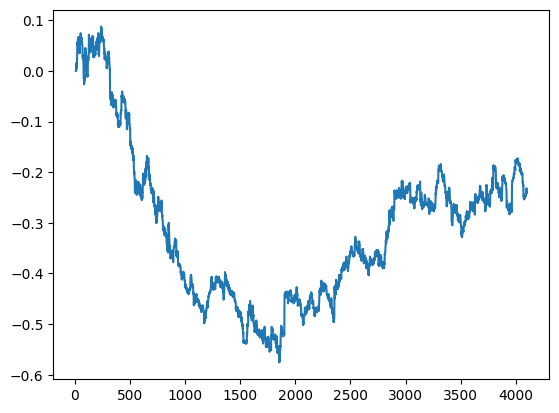

In [120]:
# Buy when the price breaks above the upper Bollinger Band
df['buy_signal'] = df['Close'] > df['upper_band']
df.loc[df['buy_signal'] == True, 'Position'] = 1

# Sell when the price drops below the 20-day moving average
df['sell_signal'] = df['Close'] < df['ma20']
df.loc[df['sell_signal'] == True, 'Position'] = -1

# Forward fill the position column to ensure we hold onto our position
# until a sell signal is generated
df['Position'].fillna(method='ffill', inplace=True)

# Calculate the daily returns of the strategy
df['Strategy Returns'] = df['Close'].pct_change() * df['Position'].shift(1)

# Plot the strategy returns
import matplotlib.pyplot as plt
plt.plot(df['Strategy Returns'].cumsum())
plt.show()

In [121]:
import tapy as ta
from tapy import Indicators

i = Indicators(df)
i.fractals(column_name_high='fractal_high', column_name_low='fractal_low')
df = i.df

# Buy when the price breaks above the fractal high
df['buy_signal1'] = df['Close'] > df['fractal_high']
df.loc[df['buy_signal1'] == True, 'Position'] = 1

# Sell when the price drops below the fractal low
df['sell_signal1'] = df['Close'] < df['fractal_low']
df.loc[df['sell_signal1'] == True, 'Position'] = -1

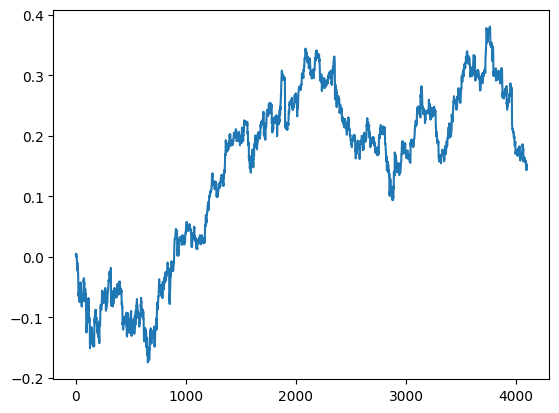

In [122]:

# Forward fill the position column to ensure we hold onto our position until a sell signal is generated
df['Position'].fillna(method='ffill', inplace=True)

# Calculate the daily returns of the strategy
df['Strategy Returns'] = df['Close'].pct_change() * df['Position'].shift(1)

# Plot the strategy returns
import matplotlib.pyplot as plt
plt.plot(df['Strategy Returns'].cumsum())
plt.show()


In [123]:
i = Indicators(df)
i.fractals(column_name_high='fractals_high', column_name_low='fractals_low')
df = i.df
df.tail()


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,buy_signal,Position,sell_signal,Strategy Returns,fractal_high,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low
4094,90.480003,90.559998,90.260002,90.519997,90.519997,62891,2024,6,7,13,...,False,1.0,True,-0.000221,False,False,True,False,False,False
4095,90.500000,90.660004,90.199997,90.300003,90.300003,45627,2024,6,7,14,...,False,1.0,True,-0.002430,False,True,True,False,False,True
4096,90.279999,91.180000,90.260002,90.900002,90.900002,55192,2024,6,7,15,...,False,1.0,True,0.006645,False,False,True,False,False,False
4097,90.900002,91.419998,90.900002,91.199997,91.199997,46251,2024,6,7,16,...,False,1.0,True,0.003300,False,False,True,False,False,False
4098,91.199997,91.239998,91.080002,91.180000,91.180000,31885,2024,6,7,17,...,False,1.0,True,-0.000219,False,False,True,False,False,False


In [124]:
VSignal = [0] * len(df)
vbackcandles = 1
for row in range(vbackcandles+1, len(df)):
    VSignal[row] = 1
    for i in range(row-vbackcandles, row):
        if df.Volume[row]<df.Volume[i] and df.Volume[row-1]<df.Volume[row-2]:
            VSignal[row]=0
df['VSignal']=VSignal


In [125]:
PriceSignal = [0]*len(df)
pbackcandles = 4
for row in range(pbackcandles, len(df)):
    PriceSignal[row] = 1
    for i in range(row-pbackcandles, row):
        if df.EMASignal[row] == 1: #downtrend
            if df.Open[row]<=df.Close[row]: #downcandle row
                PriceSignal[row]=0
            elif df.Open[i]>df.Close[i]: #downcandle i we are looking for 4 upcandles
                PriceSignal[row]=0
        if df.EMASignal[row] == 2: #uptrend
            if df.Open[row]>=df.Close[row]: #upcandle row
                PriceSignal[row]=0
            elif df.Open[i]<df.Close[i]: #upcandle i we are looking for 4 dowcandles
                PriceSignal[row]=0
        else:
            PriceSignal[row] = 0

df['PriceSignal']=PriceSignal


In [126]:
TotSignal = [0] * len(df)
for row in range(0, len(df)):
    if df.EMASignal[row]==1 and df.VSignal[row]==1 and df.PriceSignal[row]==1:
        TotSignal[row]=1
    if df.EMASignal[row]==2 and df.VSignal[row]==1 and df.PriceSignal[row]==1:
        TotSignal[row]=2

df['TotSignal']=TotSignal


In [127]:
SLSignal = [0] * len(df)
SLbackcandles = 4
for row in range(SLbackcandles, len(df)):
    mi=1e10
    ma=-1e10
    if df.EMASignal[row]==1:
        for i in range(row-SLbackcandles, row+1):
            ma = max(ma,df.High[i])
        SLSignal[row]=ma
    if df.EMASignal[row]==2:
        for i in range(row-SLbackcandles, row+1):
            mi = min(mi,df.Low[i])
        SLSignal[row]=mi

df['SLSignal']=SLSignal

In [128]:
grid_distance = 0.005
midprice = df['High'].median()

In [129]:
def generate_grid(midprice, grid_distance, grid_range):
    return (np.arange(midprice-grid_range, midprice+grid_range, grid_distance))

grid = generate_grid(midprice=midprice, grid_distance=grid_distance, grid_range=0.1)
grid


array([96.74999847, 96.75499847, 96.75999847, 96.76499847, 96.76999847,
       96.77499847, 96.77999847, 96.78499847, 96.78999847, 96.79499847,
       96.79999847, 96.80499847, 96.80999847, 96.81499847, 96.81999847,
       96.82499847, 96.82999847, 96.83499847, 96.83999847, 96.84499847,
       96.84999847, 96.85499847, 96.85999847, 96.86499847, 96.86999847,
       96.87499847, 96.87999847, 96.88499847, 96.88999847, 96.89499847,
       96.89999847, 96.90499847, 96.90999847, 96.91499847, 96.91999847,
       96.92499847, 96.92999847, 96.93499847, 96.93999847, 96.94499847])

In [130]:
signal = [0]*len(df)
i=0
for index, row in df.iterrows():
    for p in grid:
        if min(row.Low, row.High)<p and max(row.Low, row.High)>p:
            signal[i]=1
    i+=1

In [131]:
df["grid_signal"]=signal
df[df["grid_signal"]==1]

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,fractal_low,buy_signal1,sell_signal1,fractals_high,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal
1361,96.019997,97.129997,95.940002,97.019997,97.019997,143526,2023,2,2,14,...,False,True,False,False,False,1,0,0,0.0,1
1362,97.000000,97.400002,96.790001,97.290001,97.290001,162715,2023,2,2,15,...,False,True,False,False,False,1,0,0,0.0,1
1365,97.010002,97.660004,96.919998,97.650002,97.650002,119859,2023,2,3,10,...,True,True,False,False,True,1,0,0,0.0,1
1373,97.300003,97.320000,96.769997,96.769997,96.769997,54928,2023,2,6,10,...,False,True,False,False,False,1,0,0,0.0,1
1374,96.769997,96.769997,96.220001,96.570000,96.570000,74182,2023,2,6,11,...,True,True,False,False,True,1,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,96.940002,97.510002,96.760002,97.339996,97.339996,68602,2024,2,6,15,...,False,True,False,False,False,1,0,0,0.0,1
3967,97.239998,97.279999,96.919998,96.919998,96.919998,115020,2024,5,16,14,...,False,True,False,False,False,1,0,0,0.0,1
3968,96.900002,97.000000,96.540001,96.680000,96.680000,127861,2024,5,16,15,...,False,True,False,False,False,1,0,0,0.0,1
3969,96.760002,96.800003,96.500000,96.760002,96.760002,132356,2024,5,16,16,...,False,True,False,False,False,1,0,0,0.0,1


In [132]:
df['Heiken_Close'] = (df.Open+df.Close+df.High+df.Low)/4
df['Heiken_Open'] = df['Open']
for i in range(1, len(df)):
    df['Heiken_Open'][i] = (df.Heiken_Open[i-1]+df.Heiken_Close[i-1])/2

df['Heiken_High'] = df[['High', 'Heiken_Open', 'Heiken_Close']].max(axis=1)
df['Heiken_Low'] = df[['Low', 'Heiken_Open', 'Heiken_Close']].min(axis=1)
df.head(10)

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\1014696069.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\1014696069.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\1014696069.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Nitin Yadav\AppData\Local\Temp\ipykernel_1008\1014696069.py:4: SettingWithCo

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Hour,...,fractals_low,VSignal,PriceSignal,TotSignal,SLSignal,grid_signal,Heiken_Close,Heiken_Open,Heiken_High,Heiken_Low
0,83.120003,83.430000,82.760002,83.320000,83.320000,88778,2022,6,8,10,...,False,0,0,0,0.0,0,83.157501,83.120003,83.430000,82.760002
1,83.309998,83.620003,82.919998,83.540001,83.540001,58976,2022,6,8,11,...,False,0,0,0,0.0,0,83.347500,83.138752,83.620003,82.919998
2,83.510002,83.760002,83.360001,83.720001,83.720001,54332,2022,6,8,12,...,False,0,0,0,0.0,0,83.587502,83.243126,83.760002,83.243126
3,83.709999,83.860001,83.629997,83.720001,83.720001,63152,2022,6,8,13,...,False,1,0,0,0.0,0,83.730000,83.415314,83.860001,83.415314
4,83.760002,84.000000,83.580002,83.589996,83.589996,78069,2022,6,8,14,...,False,1,0,0,0.0,0,83.732500,83.572657,84.000000,83.572657
5,83.589996,83.769997,83.150002,83.709999,83.709999,108487,2022,6,8,15,...,False,1,0,0,0.0,0,83.554998,83.652578,83.769997,83.150002
6,83.709999,83.730003,83.019997,83.290001,83.290001,239787,2022,6,8,16,...,False,1,0,0,0.0,0,83.437500,83.603788,83.730003,83.019997
7,83.300003,83.449997,83.220001,83.379997,83.379997,71255,2022,6,8,17,...,False,1,0,0,0.0,0,83.337500,83.520644,83.520644,83.220001
8,82.889999,83.360001,82.629997,83.290001,83.290001,38261,2022,6,9,10,...,True,0,0,0,0.0,0,83.042500,83.429072,83.429072,82.629997
9,83.349998,83.349998,82.779999,82.870003,82.870003,40661,2022,6,9,11,...,False,1,0,0,0.0,0,83.087500,83.235786,83.349998,82.779999


In [133]:
import pandas_ta as ta

# Assuming 'df' is your DataFrame containing OHLC data

# Calculate Exponential Moving Averages (EMAs) and RSI
df["EMA20"] = ta.ema(df.Close, length=20)
df["EMA50"] = ta.ema(df.Close, length=50)
df['RSI'] = ta.rsi(df.Close, length=12)

# Fill missing values for the specified columns using backfill
columns_to_fill = ["EMA20", "EMA50", "RSI"]
df[columns_to_fill] = df[columns_to_fill].fillna(method='bfill')


In [140]:
import plotly.graph_objects as go
import pandas as pd

# Assuming dfpl is your DataFrame containing the Heiken Ashi data and EMA values
# Replace with your actual DataFrame
dfpl = df.copy()  # Replace with your actual data

fig = go.Figure(data=[
    go.Candlestick(x=df_new.index,
                   open=dfpl['Heiken_Open'],
                   high=dfpl['Heiken_High'],
                   low=dfpl['Heiken_Low'],
                   close=dfpl['Heiken_Close'],
                   name="Candlestick"),
    go.Scatter(x=df_new.index, y=dfpl['EMA20'], mode='lines', name='EMA20', line=dict(color='red')),
    go.Scatter(x=df_new.index, y=dfpl['EMA50'], mode='lines', name='EMA50', line=dict(color='blue'))
])

fig.update_layout(
    title='Candlestick Chart with EMA',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

# Save as HTML and open in browser
fig.write_html('plot.html', auto_open=True)


In [141]:
def totalSignal(df):
    ordersignal=[0]*len(df)
    for i in range(0, len(df)):
        if (df.EMA20[i]>df.EMA50[i] and df.Heiken_Open[i]<df.EMA20[i]
            and df.Heiken_Close[i]>df.EMA20[i]):
            ordersignal[i]=2
        if (df.EMA20[i]<df.EMA50[i] and df.Heiken_Open[i]>df.EMA20[i]
            and df.Heiken_Close[i]<df.EMA20[i]):
            ordersignal[i]=1
    df['ordersignal']=ordersignal

totalSignal(df)

In [143]:
import pandas_ta as ta

# Assuming 'df' is your DataFrame containing OHLC data

# Calculate ADX
a = ta.adx(df.High, df.Low, df.Close, length=14)

# Join ADX_14 column to the DataFrame
df = df.join(a.ADX_14)

# Fill missing values for ADX_14 column using backfill
df['ADX_14'].fillna(method='bfill', inplace=True)


In [144]:
def addemasignal(df, backcandles):
    emasignal = [0]*len(df)
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row-backcandles, row+1):
            if df.High[i]>=df.EMA[i]:
                dnt=0
            if df.Low[i]<=df.EMA[i]:
                upt=0
        if upt==1 and dnt==1:
            #print("!!!!! check trend loop !!!!")
            emasignal[row]=3
        elif upt==1:
            emasignal[row]=2
        elif dnt==1:
            emasignal[row]=1
    df['EMASignal1'] = emasignal

addemasignal(df,6)

In [145]:
def totalSignal(df, ADX):
    ordersignal=[0]*len(df)
    for i in range(0, len(df)):
        if  df.RSI[i]<=25 and ADX[i]>=20 and df.EMASignal[i]==2:
            ordersignal[i]=2
    df['long_signal']=ordersignal

totalSignal(df, df.ADX_14)

In [146]:
import numpy as np
df['martiangle_signal'] = np.random.random(len(df))
df['martiangle_signal'] = df['martiangle_signal'].apply(lambda x: 1 if x<0.5 else 2)

In [147]:
df['Trend'].fillna('4.0', inplace=True)


In [148]:
df['Strategy Returns'].dropna(inplace=True)

In [149]:
# Assuming 'df' is your DataFrame containing OHLC data

# Calculate the difference between the current 'Close' and the previous 'Close'
df['Close_diff'] = df['Close'].diff()

# Create a new column indicating whether the candle is up or down from the previous one
df['Candle_direction'] = 'Up'  # By default, set all candles to 'Up'

# Set 'Candle_direction' to 'Down' for candles with a negative 'Close_diff'
df.loc[df['Close_diff'] < 0, 'Candle_direction'] = 'Down'

# Replace 'Up' by 1 and 'Down' by 2
df['Candle_direction'].replace({'Up': 1, 'Down': 2}, inplace=True)

# Drop the 'Close_diff' column if you don't need it anymore
df.drop(columns=['Close_diff'], inplace=True)


In [150]:
df_cleaned=df.drop(['Open','High','Low','Close','Adj Close',
                  'Volume','RSI','EMA','ma20','middle_band','upper_band'
                  ,'lower_band','Strategy Returns','Heiken_Close','Heiken_Open',
                  'Heiken_High','Heiken_Low','EMA20','EMA50','ADX_14','pointpos','Channel','Trend'],axis='columns')

In [151]:
df_cleaned

,Year,Month,Day,Hour,Minute,EMASignal,isPivot,CHOCH_pattern_detected,fibonacci_signal,SL,...,PriceSignal,TotSignal,SLSignal,grid_signal,ordersignal,SLSignal_heiken,EMASignal1,long_signal,martiangle_signal,Candle_direction
0,2022,6,8,10,0,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0,0,1,1
1,2022,6,8,11,0,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0,0,2,1
2,2022,6,8,12,0,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0,0,2,1
3,2022,6,8,13,0,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0,0,1,1
4,2022,6,8,14,0,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4094,2024,6,7,13,0,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0,0,1,2
4095,2024,6,7,14,0,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0,0,2,2
4096,2024,6,7,15,0,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0,0,1,1
4097,2024,6,7,16,0,0,0,0,0,0,...,0,0,0.0,0,0,0.0,0,0,1,1


In [152]:
df = df_cleaned.dropna()

In [153]:
# Create a boolean DataFrame indicating the locations of NaN values
na_locations = df.isna()

# Get the row and column indices where NaN values occur
rows, cols = np.where(na_locations)

# Print the row and column indices of NaN values
for row, col in zip(rows, cols):
    print(f"NaN value found at row {row} and column {col}")


In [154]:
import pandas as pd

# Assuming df is your DataFrame and 'specific_column' is the name of the column you want to modify
# Replace 'specific_column' with the actual name of your column

df_cleaned['Candle_direction'] = df_cleaned['Candle_direction'].replace(2, 0)


In [155]:
import pandas as pd

# Convert boolean column to integer
df_cleaned['buy_signal'] = df_cleaned['buy_signal'].astype(int)
df_cleaned['sell_signal'] = df_cleaned['sell_signal'].astype(int)
df_cleaned['fractal_high'] = df_cleaned['fractal_high'].astype(int)
df_cleaned['fractal_low'] = df_cleaned['fractal_low'].astype(int)
df_cleaned['buy_signal1'] = df_cleaned['buy_signal1'].astype(int)
df_cleaned['sell_signal1'] = df_cleaned['sell_signal1'].astype(int)
df_cleaned['fractals_high'] = df_cleaned['fractals_high'].astype(int)
df_cleaned['fractals_low'] = df_cleaned['fractals_low'].astype(int)



In [160]:
df_cleaned.to_csv('C:\\SMP\\notebook\\df_cleaned.csv', index=False)
